<a href="https://colab.research.google.com/github/Jonathan-Oviedo/ML-23-TEA/blob/Labs/Crate_and_Barrel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crate and Barrel Project
By: Jonathan Oviedo and Gerald Atilus

The work done for this project was done in collaboration with each member contributing an equal amount of work for each section, so the work was just added to one collab.

# Attempt One using Random Search and Decision Trees

This attempt we tried using random search and decision trees. We ended up with about 57% accuracy which was not bad but we wanted to see if it could be improved using a different method.

Importing the needed libraries

In [2]:
#This imports the libraries needed. Mostly taken from previous labs like xgboost and decision tree
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder


# Preparing the data

we prepare the data by reading the csv files and converting our data to numeric values

In [4]:
#loading the testing and training data from the kaggle CSV files
trainData = pd.read_csv("train.csv")
testData =  pd.read_csv("test.csv")

#Getting the target and id from the training data
targetTrain = trainData[["target","id"]]

#the columns target and id are dropped from trainData.
trainData = trainData.drop(["target","id"], axis=1)

#creating classes from the target variable
#created trainLabel to have a unique class for the numeric value
trainLabel = targetTrain['target']
Class = np.unique(trainLabel)
#testData prints here to check for an issue I ran into for for the "id" column
print(testData.columns)

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

# Random Search Implementation

We first needed to find the best parameters to use for our model and by creating paramDistribution along with a larger range for estimators, depth, min split, and min leaf we were able to do so.



after param runs a clf and rfc object are created and clf is fit to the training data we previously implemented.



this whole process does take some time to run on average about 15-20 mins so we leave the results as is since how time consuming it can be.

In [5]:
#Defining the parameter
paramDistribution = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#creating an rfc
RFC = RandomForestClassifier()

#creating a clf object
clf = RandomizedSearchCV(RFC, paramDistribution, n_iter=10, cv=5)

#fitting the model to training so we can find the optimal params to use.
clf.fit(trainData, trainLabel)
#This took a bit of time to run. 15-20 on average, take that into account.

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]})

In [6]:
#finding the best parammeters 
print(clf.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


# Now that we have the values for the parameters

we create and fit the RFC using our optimal numbers. taken from clf.best_params_

we faced some issues when attempting to fit the testData and creating a dataframe with the prediction but were able to work through it by eliminating the "id" as we did for trainingData and save it for later use when submitting the csv.

In [7]:
#setting the params we found into a variable
bestParam = clf.best_params_

#creating a new RFC using our bestParam variable
bestRFC = RandomForestClassifier(**bestParam)

#fitting the new RFC with trainData and trainLabel
fitting = bestRFC.fit(trainData, trainLabel)

# When attempting to submit the csv files we found that we needed to readd the id column we was dropping in testData so we needed to save those id titles to later be attached to our final data frame
testIDs = testData["id"]
testIDs = pd.DataFrame(testIDs, columns=["id"])

# Drop the "id" column from the test data
testData = testData.drop("id", axis=1)

#after doing this we run the prediction CHANGED TO predict_proba to fix an issue when putting it into the dataframe we made.
prediction = fitting.predict_proba(testData)

#creating a dataframe for the probabilities to see the numeric values since regular printing just gives us the classes
predictionDF = pd.DataFrame(prediction, columns = ["Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7", "Class_8", "Class_9"])
#print the head of the new dataframe to see how the prediction for each column looks
predictionDF.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.012242,0.243294,0.227362,0.419809,0.003000,0.036551,0.038909,0.015833,0.003000
1,0.007833,0.045083,0.021893,0.007000,0.002768,0.572028,0.028315,0.305567,0.009512
2,0.000000,0.000000,0.000000,0.000000,0.004000,0.977167,0.000000,0.017167,0.001667
3,0.004583,0.526644,0.272036,0.078005,0.000000,0.001250,0.003333,0.005208,0.108940
4,0.122732,0.006607,0.003929,0.000000,0.002500,0.035988,0.016083,0.311598,0.500563


# Creating the submission file for kaggle

In [8]:
#have to add the id's columns we saved previously to the final submission
submissionDF = pd.concat([testIDs,predictionDF], axis=1)
#convert dataframe to a csv so we can submit to kraggle
submissionDF.to_csv("submissionAttempt2.csv", index=False)

# Results
private score: 57%

public score:  56%

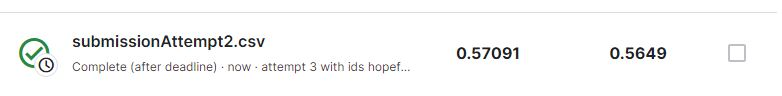

# Attempt 2 using GridSearch 
Grid Search was a familiar method to use as our model since it closely resemebled the way a random search is used, we wanted to see if using a grid vs a random would yield a different outcome and if that outcome was better or worse for each method.

This resulted in a slight increase in accuracy but not one of great significance

Importing the needed libraries 

In [9]:
#Imports the needed libraries we use. Similair to the previous implementation only importing gridsearch over randomsearch
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#Preparing the data



we prepare the data by reading the csv files and converting our data to numeric values
same as before except we now use a label encoder to convert the values in targetTrain to numeric and still checking for the id value in test


In [11]:
#loading the testing and training data from the kaggle CSV files
trainData = pd.read_csv("train.csv")
testData =  pd.read_csv("test.csv")

#Getting the target and id from the training data
targetTrain = trainData[["target","id"]]

#encoder is used to convert the targettrain to a numeric value this is so the class1-class9 can be read as numeric representations instead.
encoderL = LabelEncoder()
targetTrain['target'] = encoderL.fit_transform(targetTrain['target'])

#the values trainData drops the target and id columns like before
trainData = trainData.drop(["target","id"], axis=1)

#creating classes from the target variable
#created trainLabel to have a unique class for the numeric value
trainLabel = targetTrain['target']
Class = np.unique(trainLabel)
#testData prints here to check for an issue I ran into for for the "id" column
print(testData.columns)

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

<ipython-input-11-3862c9099b8e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetTrain['target'] = encoderL.fit_transform(targetTrain['target'])


# Grid Search Implementation

Like before we first needed to find the best parameters to use for our model and by creating paramGrid along with a larger range for estimators, depth, min split, and min leaf we were able to do so.

after param runs a rfc object is created and gridSearch is fit to the training data we previously implemented.

this whole process does take some time to run on average about 15-20 mins so we leave the results as is since how time consuming it can be.

In [16]:
# Define the parameter grid
paramGrid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
RFC = RandomForestClassifier(n_jobs = -1)

# Create a grid search object
grid_search = GridSearchCV(estimator=RFC, param_grid=paramGrid,n_jobs =-1, cv=5)

#this took almost 3 hours to run the first time we added n_jobs=-1 to use all possible cores and it took about 1 hour 30 mins I would not reccomend running again if it can be avoided.
# Fit the grid search object to the training data
grid_search.fit(trainData, trainLabel)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

#Finding the best parameters to use

In [17]:
# Find the best parameters
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Using our newly found parameters:


In [18]:
bestParams = grid_search.best_params_

# Create a new RFC using the best parameters
bestRFC = RandomForestClassifier(**bestParams)

# Fit the new RFC with trainData and trainLabel
bestRFC.fit(trainData, trainLabel)

# Get the "id" column from the test data and save them in testIDs
testIDs = testData["id"]
testIDs = pd.DataFrame(testIDs, columns=["id"])

# Drop the "id" column from the test data
testData = testData.drop("id", axis=1)

# Make predictions on the test data
prediction = bestRFC.predict_proba(testData)

# Create a dataframe for the probabilities and manually setting the column names
predictionDF = pd.DataFrame(prediction, columns = ["Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7", "Class_8", "Class_9"])
#print the head of the new dataframe to see how the prediction for each column looks
predictionDF.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,0.005,0.22,0.215,0.465,0.0,0.02,0.05,0.015,0.010
1,0.030,0.05,0.025,0.015,0.0,0.46,0.02,0.380,0.020
2,0.000,0.00,0.000,0.000,0.0,0.98,0.00,0.020,0.000
3,0.000,0.53,0.300,0.095,0.0,0.00,0.01,0.000,0.065
4,0.085,0.00,0.000,0.000,0.0,0.03,0.04,0.290,0.555


# Creating the submission file for kaggle

same process as before

In [19]:
#have to add the id's columns we saved previously to the final submission
submissionDF = pd.concat([testIDs,predictionDF], axis=1)
#convert dataframe to a csv so we can submit to kraggle
submissionDF.to_csv("submissionGRID.csv", index=False)

# Results

Using grid search

private score: 57%

public score:  57%

image goes here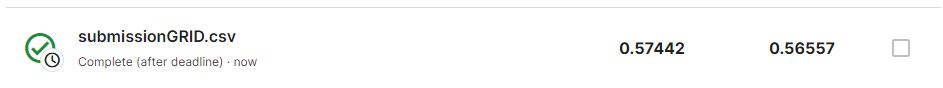

When comparing the results of these two methods we foudn that grid ended up working better but not enough to justify the length it takes to run. The time it takes to fit the model is drastically different for both and should probably be considered when attempting this. Randomsearch was faster and gave back a slightly smaller accuracy while gridsearch was much slower even when given more cores to work with and came back with a slight edge in the results.


We are content with our given results and in the future are more likely to use randomsearcg as our chosen model due to the time difference between these two.